# Community Detection

In [4]:
# !pip install python-louvain

In [5]:
from polygraphs.analysis import Processor
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import seaborn as sns

In [6]:
processor = Processor(["../../../CollegeMSG"], config_check=False)
len(processor.graphs)

335

In [7]:
# picking a graph from the available graphs using indexing
graph = processor.graphs[99]

## Applying Label Propagation

In [8]:
# Apply Label Propagation Algorithm
lp_communities = nx.algorithms.community.label_propagation_communities(graph)

# Convert generator output to dictionary: {node: community_id}
community_mapping = {}
for community_id, nodes in enumerate(lp_communities):
    for node in nodes:
        community_mapping[node] = community_id

In [9]:
set(community_mapping.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [10]:
# Convert community mapping to a DataFrame
lp_community_df = pd.DataFrame.from_dict(community_mapping, orient="index", columns=["community"])
lp_community_df.reset_index(inplace=True)
lp_community_df.rename(columns={"index": "node"}, inplace=True)

In [11]:
lp_community_df.to_csv("label_propagation_community_assignments.csv", index=False)

/var/folders/1c/f0l1c8xj21b5_d53qldvsm200000gn/T/ipykernel_47219/85966643.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(unique_communities))  # Distinct colors for communities
/Users/prudhvivuda/Documents/polygraphs/.venv/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


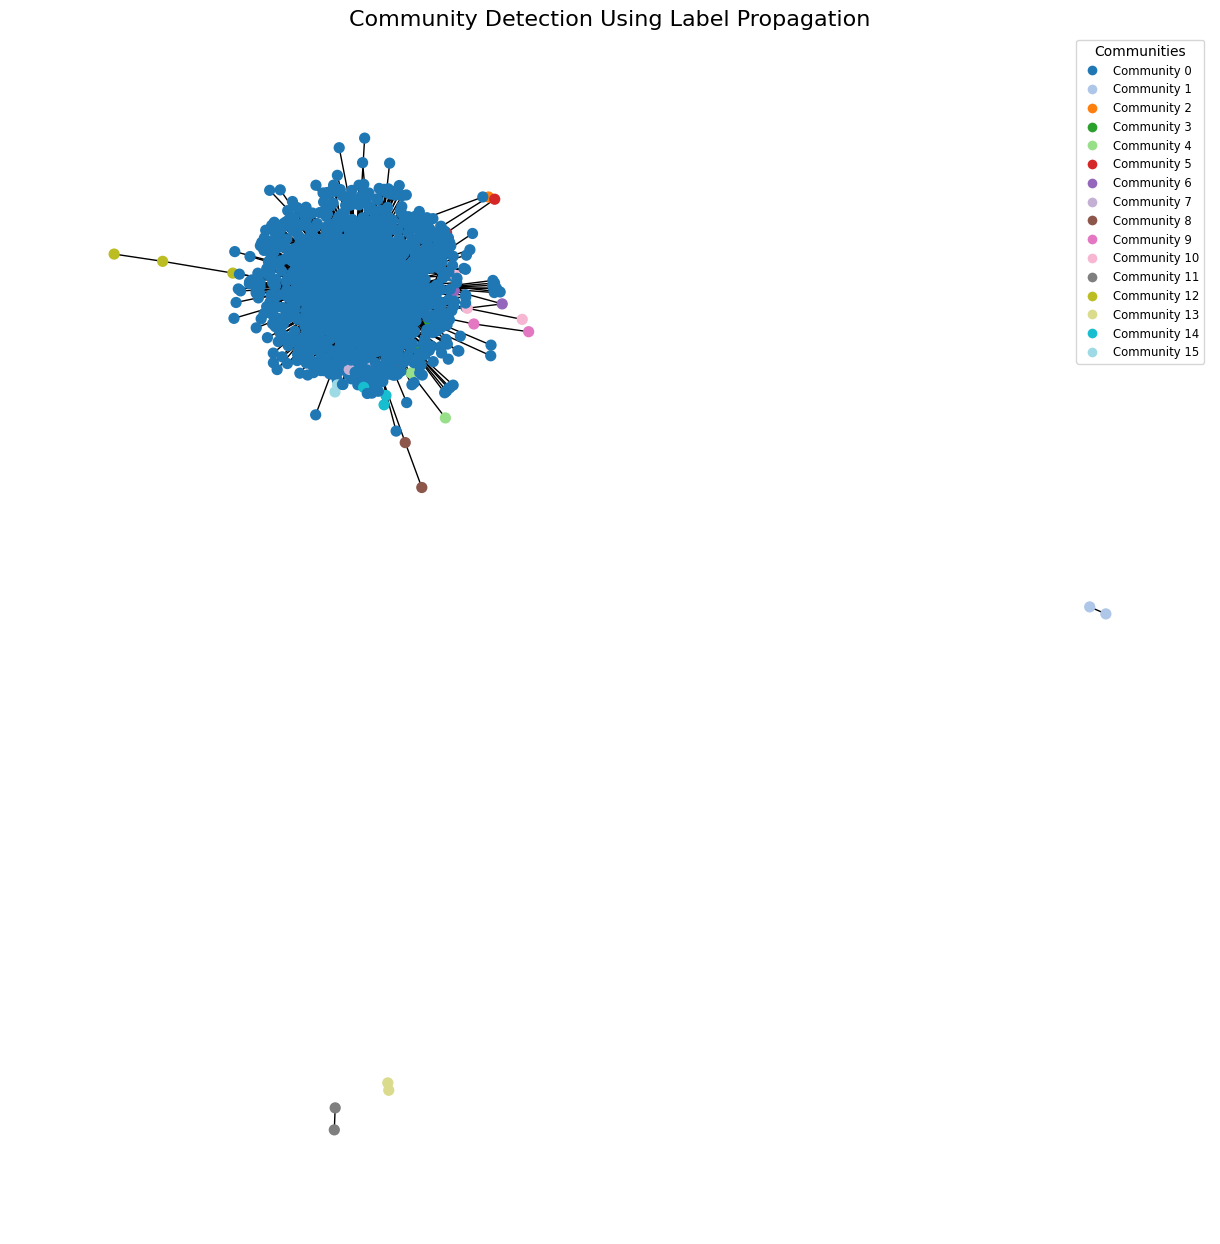

In [12]:
# Extract unique communities and assign colors
unique_communities = set(community_mapping.values())
color_map = cm.get_cmap('tab20', len(unique_communities))  # Distinct colors for communities
community_colors = {community: color_map(i) for i, community in enumerate(unique_communities)}

# Map node colors to their respective communities
node_colors = [community_colors[community_mapping[node]] for node in graph.nodes()]

# Plot the graph with community-based coloring
plt.figure(figsize=(12, 12))
nx.draw(
    graph,
    node_color=node_colors,
    with_labels=False,
    node_size=50,
    cmap=plt.cm.tab20
)

# Add legend for communities
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=community_colors[c], markersize=8, label=f"Community {c}")
    for c in unique_communities
]
plt.legend(
    handles=legend_elements,
    title="Communities",
    loc="upper right",
    fontsize='small',
    title_fontsize='medium'
)

# Final touches for the plot
plt.title("Community Detection Using Label Propagation", fontsize=16)
plt.show()


 INFO matplotlib.category> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
 INFO matplotlib.category> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


/var/folders/1c/f0l1c8xj21b5_d53qldvsm200000gn/T/ipykernel_47219/2846501175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=community_sizes.index, y=community_sizes.values, palette="viridis")


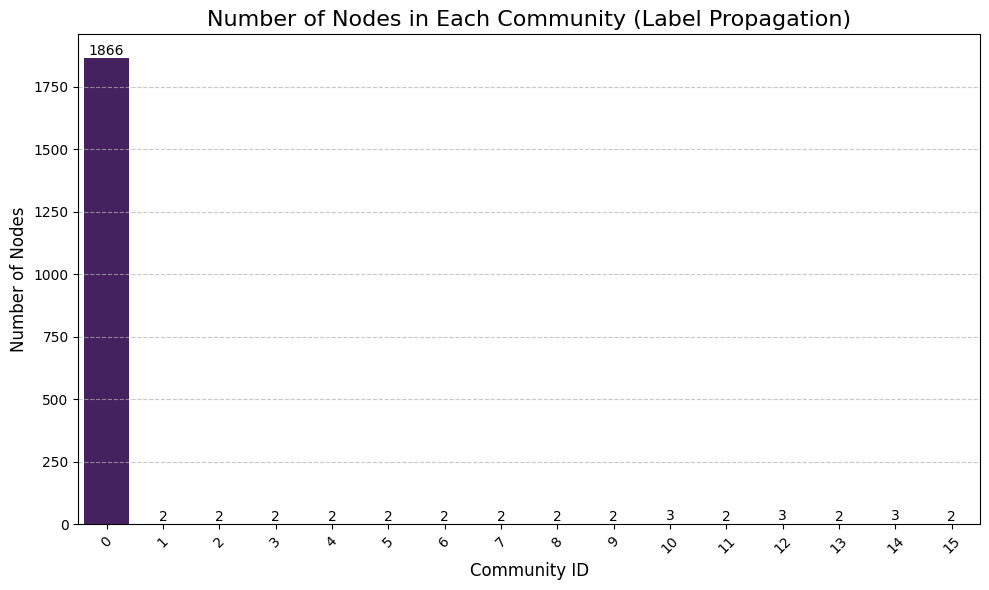

In [13]:
# Count the number of nodes in each community
community_sizes = lp_community_df["community"].value_counts().sort_index()

# Plot a histogram of community sizes
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=community_sizes.index, y=community_sizes.values, palette="viridis")

# Add counts on top of each bar
for bar, count in zip(barplot.patches, community_sizes.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,  # Position the text
             str(count), ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title("Number of Nodes in Each Community (Label Propagation)", fontsize=16)
plt.xlabel("Community ID", fontsize=12)
plt.ylabel("Number of Nodes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## Applying Louvain Algorithm

In [14]:
import community as community_louvain

# Compute the best partition (Louvain method)
louvain_communities = community_louvain.best_partition(graph)
louvain_community_mapping = louvain_communities  

In [15]:
set(louvain_communities.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [16]:
# Create a DataFrame
louvain_community_df = pd.DataFrame({
    "node": list(louvain_communities.keys()),
    "community": list(louvain_communities.values())
})

louvain_community_df.to_csv("louvain_community_assignments.csv", index=False)

/var/folders/1c/f0l1c8xj21b5_d53qldvsm200000gn/T/ipykernel_47219/2879406688.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(unique_communities))  # Get distinct colors
/Users/prudhvivuda/Documents/polygraphs/.venv/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


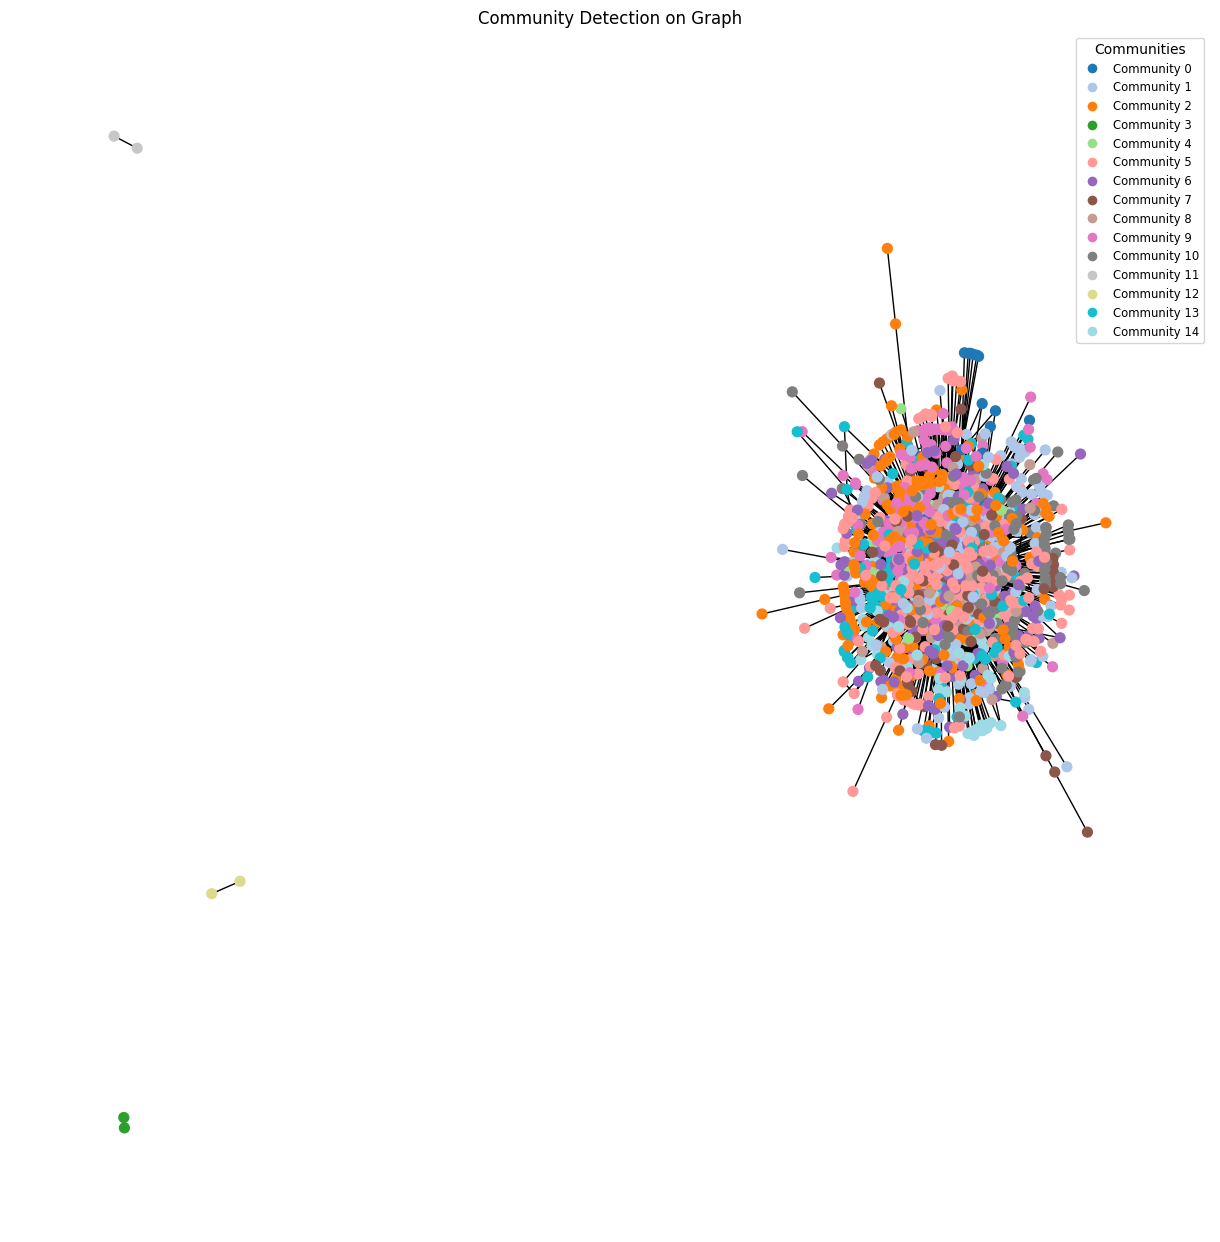

In [17]:
# Generate community colors
unique_communities = list(set(louvain_communities.values()))
color_map = cm.get_cmap('tab20', len(unique_communities))  # Get distinct colors
community_colors = {community: color_map(i) for i, community in enumerate(unique_communities)}

# Assign node colors based on their communities
node_colors = [community_colors[louvain_communities[node]] for node in graph.nodes()]

# Plot the graph
plt.figure(figsize=(12, 12))
nx.draw(
    graph,
    node_color=node_colors,
    with_labels=False,
    node_size=50,
    cmap=plt.cm.tab20
)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=community_colors[c], markersize=8, label=f"Community {c}")
    for c in unique_communities
]
plt.legend(
    handles=legend_elements,
    title="Communities",
    loc="upper right",
    fontsize='small',
    title_fontsize='medium'
)

plt.title("Community Detection on Graph")
plt.show()

 INFO matplotlib.category> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
 INFO matplotlib.category> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


/var/folders/1c/f0l1c8xj21b5_d53qldvsm200000gn/T/ipykernel_47219/2855929511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=louvain_community_sizes.index, y=louvain_community_sizes.values, palette="coolwarm")


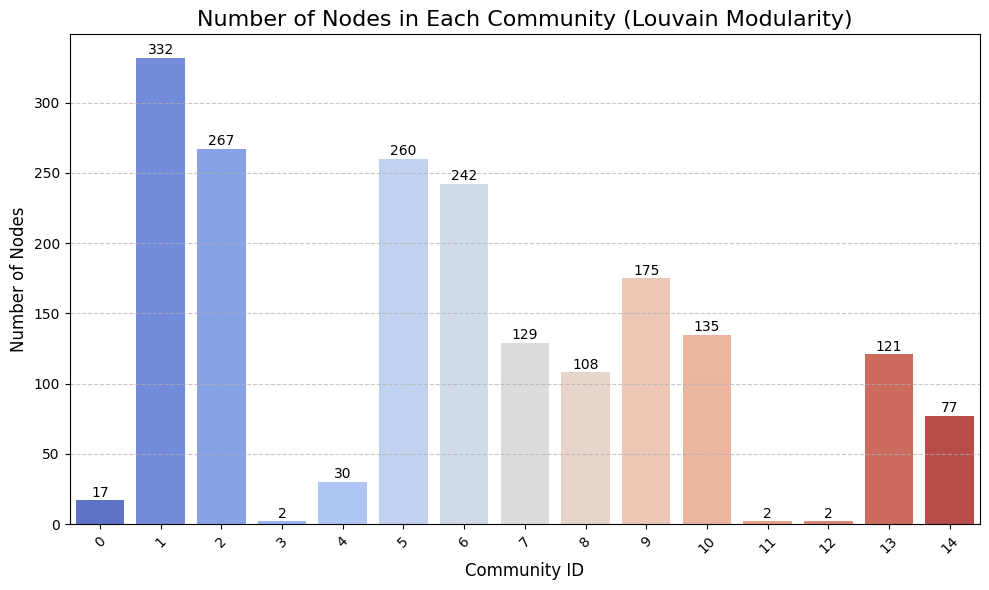

In [18]:
# Count the number of nodes in each Louvain community
louvain_community_sizes = pd.Series(louvain_community_mapping).value_counts().sort_index()

# Plot a histogram of Louvain community sizes
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=louvain_community_sizes.index, y=louvain_community_sizes.values, palette="coolwarm")

# Add counts on top of each bar
for bar, count in zip(barplot.patches, louvain_community_sizes.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,  # Position the text
             str(count), ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title("Number of Nodes in Each Community (Louvain Modularity)", fontsize=16)
plt.xlabel("Community ID", fontsize=12)
plt.ylabel("Number of Nodes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Visualization of credences within a given sim

In [19]:
# Collect Belief Data
beliefs = processor.beliefs[99]

In [20]:
beliefs

beliefs
iteration node          
0         0     0.467996
          1     0.268078
          2     0.707233
          3      0.20551
          4     0.306799
...                  ...
25000     1894  0.000435
          1895  0.999978
          1896  0.019339
          1897       1.0
          1898       1.0

[478548 rows x 1 columns]

In [21]:
beliefs = beliefs.reset_index()
beliefs.head()

,iteration,node,beliefs
0,0,0,0.467996
1,0,1,0.268078
2,0,2,0.707233
3,0,3,0.20551
4,0,4,0.306799


In [22]:
# Assign Louvain community to each node
beliefs["louvain_community"] = beliefs["node"].map(louvain_community_mapping)

louvain_beliefs = beliefs.copy()

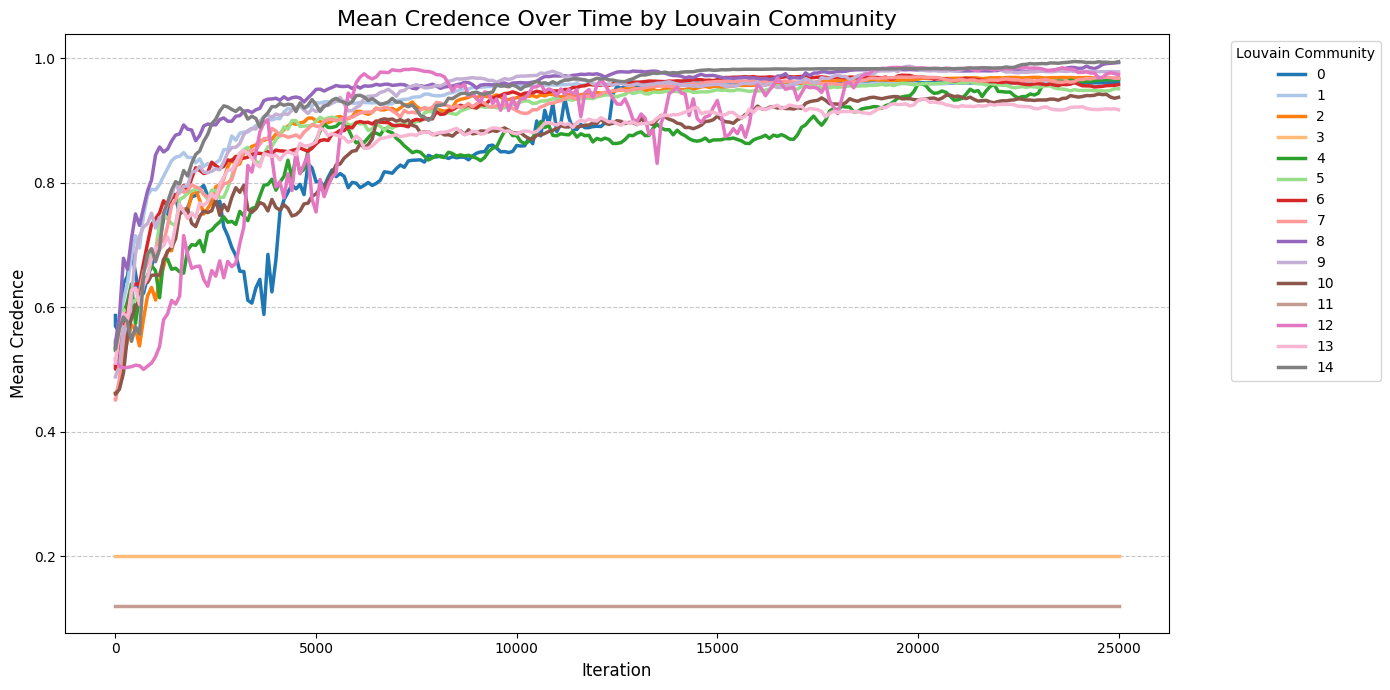

In [23]:
# Compute mean credence per Louvain community at each iteration
mean_credence_by_community = (
    louvain_beliefs.groupby(["louvain_community", "iteration"])
    .agg(mean_credence=("beliefs", "mean"))
    .reset_index()
)

# Plot mean credence for each community
plt.figure(figsize=(14, 7))
sns.lineplot(data=mean_credence_by_community,
             x="iteration",
             y="mean_credence",
             hue="louvain_community",
             palette="tab20",
             lw=2.5)

# Add titles and labels
plt.title("Mean Credence Over Time by Louvain Community", fontsize=16)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Mean Credence", fontsize=12)
plt.legend(title="Louvain Community", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


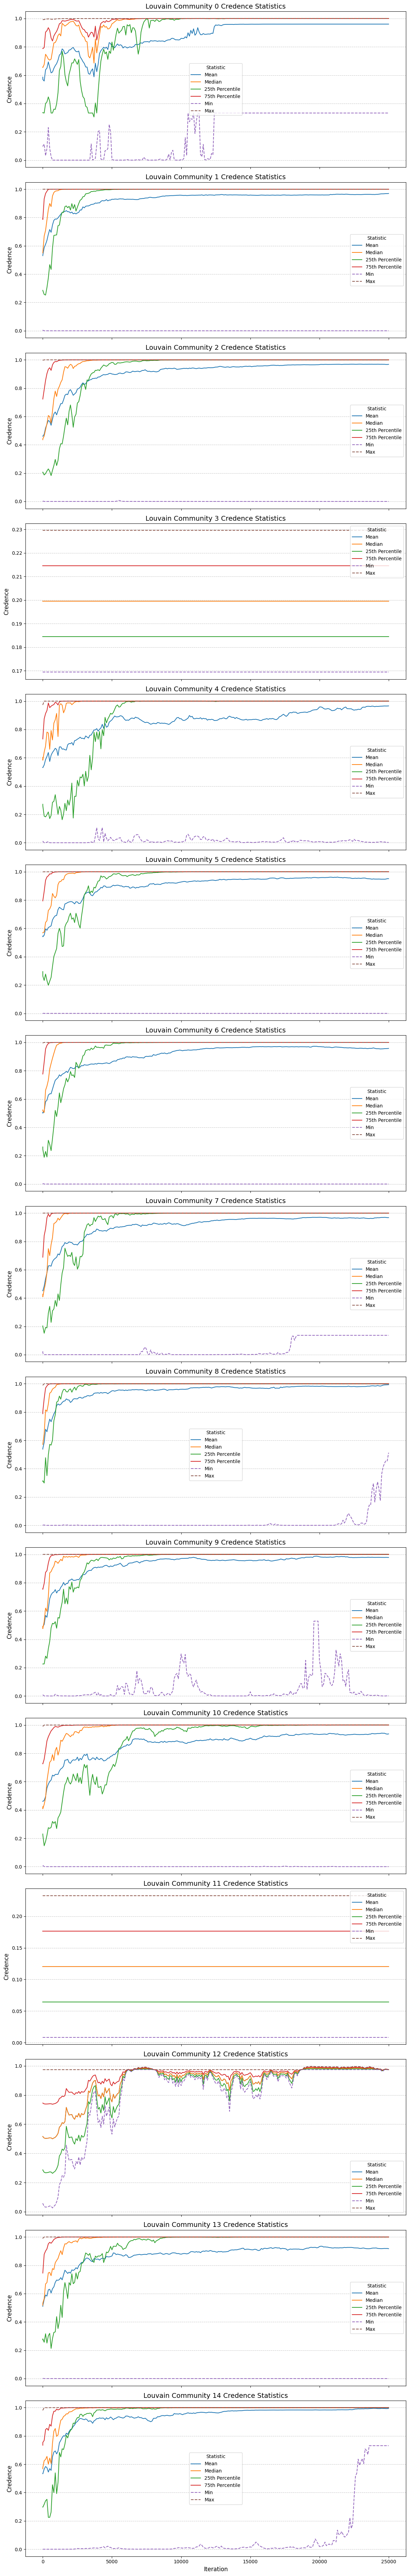

In [24]:
# Compute statistics per Louvain community at each iteration
community_stats = (
    louvain_beliefs.groupby(["louvain_community", "iteration"])
    .agg(min_credence=("beliefs", "min"),
         max_credence=("beliefs", "max"),
         mean_credence=("beliefs", "mean"),
         median_credence=("beliefs", "median"),
         p25_credence=("beliefs", lambda x: x.quantile(0.25)),
         p75_credence=("beliefs", lambda x: x.quantile(0.75)))
    .reset_index()
)

# Plot statistics for each community
num_communities = community_stats["louvain_community"].nunique()
fig, axes = plt.subplots(num_communities, 1, figsize=(12, 5 * num_communities), sharex=True)

for idx, community in enumerate(sorted(community_stats["louvain_community"].unique())):
    data = community_stats[community_stats["louvain_community"] == community]
    ax = axes[idx] if num_communities > 1 else axes

    sns.lineplot(data=data, x="iteration", y="mean_credence", label="Mean", ax=ax)
    sns.lineplot(data=data, x="iteration", y="median_credence", label="Median", ax=ax)
    sns.lineplot(data=data, x="iteration", y="p25_credence", label="25th Percentile", ax=ax)
    sns.lineplot(data=data, x="iteration", y="p75_credence", label="75th Percentile", ax=ax)
    sns.lineplot(data=data, x="iteration", y="min_credence", label="Min", ax=ax, linestyle="--")
    sns.lineplot(data=data, x="iteration", y="max_credence", label="Max", ax=ax, linestyle="--")

    # Add titles and labels
    ax.set_title(f"Louvain Community {community} Credence Statistics", fontsize=14)
    ax.set_ylabel("Credence", fontsize=12)
    ax.legend(title="Statistic")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.xlabel("Iteration", fontsize=12)
plt.tight_layout()
plt.show()


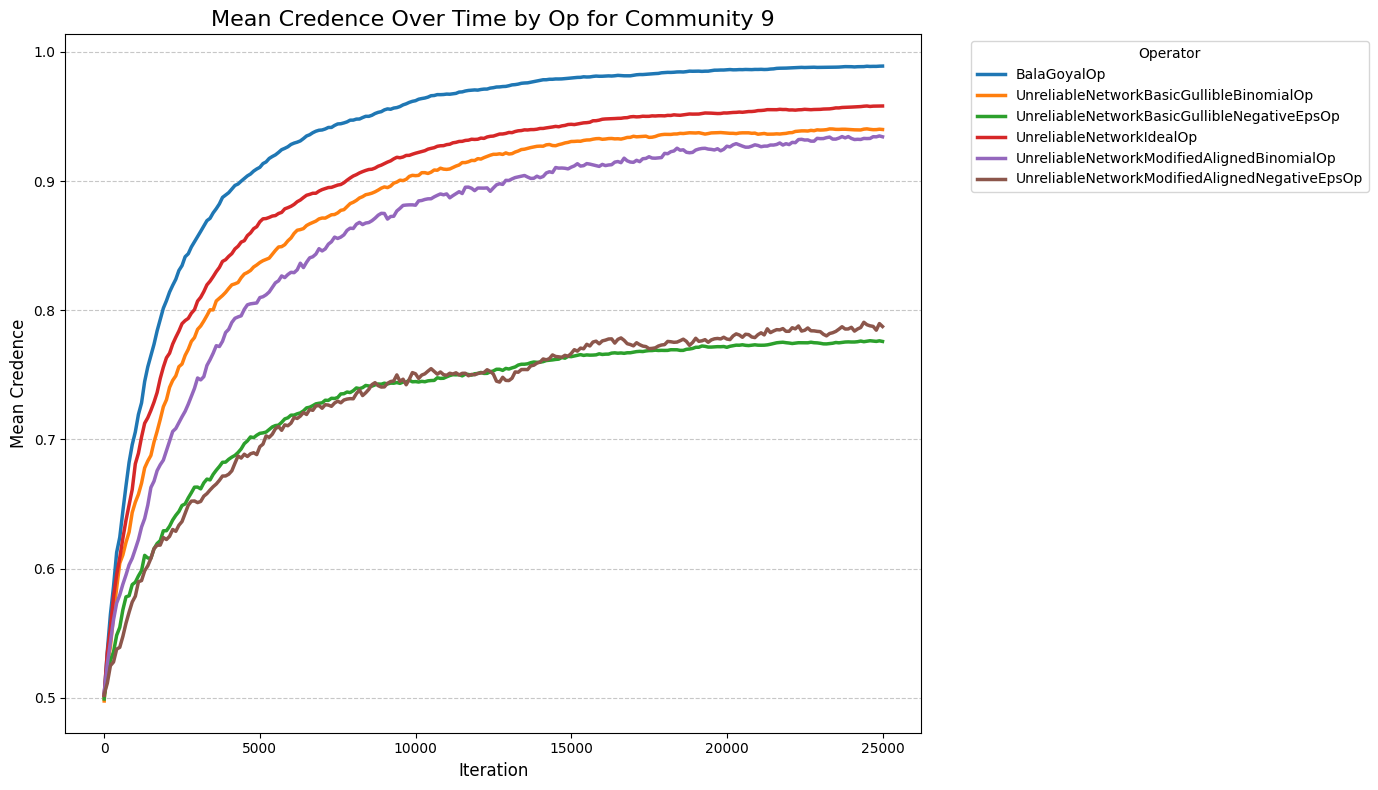

In [25]:
# Merge data from all sims
all_beliefs = pd.DataFrame()

for sim_id in processor.sims.index:
    sim_beliefs = processor.beliefs[sim_id].reset_index()
    sim_beliefs["sim"] = sim_id
    sim_beliefs["op"] = processor.sims.loc[sim_id, "op"]
    # sim_beliefs["reliability"] = processor.sims.loc[sim_id, "reliability"]
    sim_beliefs["louvain_community"] = sim_beliefs["node"].map(louvain_community_mapping)
    all_beliefs = pd.concat([all_beliefs, sim_beliefs], ignore_index=True)

# Compute mean credence per Op, community, and iteration
op_community_credence = (
    all_beliefs.groupby(["op", "louvain_community", "iteration"])
    .agg(mean_credence=("beliefs", "mean"))
    .reset_index()
)

# Visualization: Mean Credence Across Ops for a Specific Community
community_id_to_visualize = 9  # Choose the community ID to visualize
community_data = op_community_credence[op_community_credence["louvain_community"] == community_id_to_visualize]

plt.figure(figsize=(14, 8))
sns.lineplot(data=community_data,
             x="iteration",
             y="mean_credence",
             hue="op",
             palette="tab10",
             lw=2.5)

# Add titles and labels
plt.title(f"Mean Credence Over Time by Op for Community {community_id_to_visualize}", fontsize=16)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Mean Credence", fontsize=12)
plt.legend(title="Operator", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
